In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from PIL import Image
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
import os
print(os.getcwd())

plt.style.use('default')
sns.set_palette("husl")

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


c:\Users\color\Desktop\fashion-recommendation\notebooks


In [5]:
csv_path = "../data/styles.csv"
image_dir = "../data/images"
styles = pd.read_csv(csv_path, on_bad_lines='skip')
print(f"원본 데이터 크기: {styles.shape}")

styles = styles.dropna(subset=['id'])
styles['id'] = styles['id'].astype(int)
print(f"ID 데이터 크기: {styles.shape}")

styles['image_path'] = styles['id'].astype(str).apply(lambda x: os.path.join(image_dir, f"{x}.jpg"))

styles = styles[styles['image_path'].apply(os.path.exists)]
print(f"유효한 이미지가 있는 데이터 크기: {styles.shape}")

styles = styles.reset_index(drop=True)
print(styles.head())
print(f"\n유효한 이미지 수: {len(styles):,}개")

원본 데이터 크기: (44424, 10)
ID 데이터 크기: (44424, 10)
유효한 이미지가 있는 데이터 크기: (861, 11)
      id gender masterCategory subCategory   articleType baseColour season  \
0  10268    Men       Footwear       Shoes  Formal Shoes      Black   Fall   
1  10866    Men        Apparel     Topwear       Tshirts        Red   Fall   
2  10065    Men        Apparel     Topwear       Tshirts     Yellow   Fall   
3  10859    Men        Apparel     Topwear       Tshirts  Navy Blue   Fall   
4  10257    Men        Apparel  Bottomwear      Trousers      Black   Fall   

     year   usage                               productDisplayName  \
0  2012.0  Formal  Clarks Men Hang Work Leather Black Formal Shoes   
1  2011.0  Casual            Wrangler Men Motor Rider Red T-Shirts   
2  2011.0  Casual          Puma Men ducati logo tee Yellow Tshirts   
3  2011.0  Casual    Wrangler Men Furious Rides Navy Blue T-Shirts   
4  2011.0  Formal        John Miller Men Solid Type Black Trousers   

                 image_path  
0  .

In [6]:
for i, col in enumerate(styles.columns, 1):
    non_null = styles[col].count()
    null_count = len(styles) - non_null
    print(f"   {i:2}. {col:20} (결측값: {null_count:,}개)")

print(f"\nData Type:")
print(styles.dtypes)

print(f"\nBasic Statistics:")
print(f"   - 총 상품 수: {len(styles):,}개")
print(f"   - 고유 ID 수: {styles['id'].nunique():,}개")
print(f"   - 메모리 사용량: {styles.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")


    1. id                   (결측값: 0개)
    2. gender               (결측값: 0개)
    3. masterCategory       (결측값: 0개)
    4. subCategory          (결측값: 0개)
    5. articleType          (결측값: 0개)
    6. baseColour           (결측값: 0개)
    7. season               (결측값: 0개)
    8. year                 (결측값: 0개)
    9. usage                (결측값: 0개)
   10. productDisplayName   (결측값: 0개)
   11. image_path           (결측값: 0개)

Data Type:
id                      int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
image_path             object
dtype: object

Basic Statistics:
   - 총 상품 수: 861개
   - 고유 ID 수: 861개
   - 메모리 사용량: 0.46 MB


In [7]:
main_columns = ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour']

for col in main_columns:
    if col in styles.columns:
        value_counts = styles[col].value_counts()
        print(f"\n{col} 분포 (상위 10개):")
        print(f"   총 {styles[col].nunique()}개 카테고리")
        
        for idx, (value, count) in enumerate(value_counts.head(10).items(), 1):
            percentage = count / len(styles) * 100
            print(f"   {idx:2}. {str(value):20} : {count:5,}개 ({percentage:5.1f}%)")

#


gender 분포 (상위 10개):
   총 5개 카테고리
    1. Men                  :   512개 ( 59.5%)
    2. Women                :   307개 ( 35.7%)
    3. Unisex               :    34개 (  3.9%)
    4. Boys                 :     4개 (  0.5%)
    5. Girls                :     4개 (  0.5%)

masterCategory 분포 (상위 10개):
   총 4개 카테고리
    1. Apparel              :   510개 ( 59.2%)
    2. Accessories          :   177개 ( 20.6%)
    3. Footwear             :   173개 ( 20.1%)
    4. Free Items           :     1개 (  0.1%)

subCategory 분포 (상위 10개):
   총 12개 카테고리
    1. Topwear              :   464개 ( 53.9%)
    2. Shoes                :   132개 ( 15.3%)
    3. Watches              :   100개 ( 11.6%)
    4. Bags                 :    65개 (  7.5%)
    5. Bottomwear           :    40개 (  4.6%)
    6. Flip Flops           :    31개 (  3.6%)
    7. Sandal               :    10개 (  1.2%)
    8. Headwear             :     7개 (  0.8%)
    9. Dress                :     5개 (  0.6%)
   10. Belts                :     5개 (  0.6%)

articleTy

In [9]:
sample_indices = np.random.choice(len(styles), min(5, len(styles)), replace=False)

print("이미지 샘플 속성:")
image_info = []

for idx in sample_indices:
    row = styles.iloc[idx]
    try:
        with Image.open(row['image_path']) as img:
            width, height = img.size
            file_size = os.path.getsize(row['image_path']) / 1024  # KB
            
            image_info.append({
                'id': row['id'],
                'width': width,
                'height': height,
                'size_kb': file_size,
                'category': row.get('masterCategory', 'Unknown')
            })
            
            print(f"   ID {row['id']:6}: {width:3}x{height:3}, {file_size:6.1f}KB, {row.get('masterCategory', 'Unknown')}")
            
    except Exception as e:
        print(f"   ID {row['id']:6}: 오류 - {e}")

if image_info:
    widths = [info['width'] for info in image_info]
    heights = [info['height'] for info in image_info]
    sizes = [info['size_kb'] for info in image_info]
    
    print(f"\n이미지 통계 ( {len(image_info)}개):")
    print(f"   평균 해상도: {np.mean(widths):.0f} x {np.mean(heights):.0f}")
    print(f"   해상도 범위: {min(widths)}x{min(heights)} ~ {max(widths)}x{max(heights)}")
    print(f"   평균 파일 크기: {np.mean(sizes):.1f}KB")


이미지 샘플 속성:
   ID  10819: 1800x2400,  359.9KB, Apparel
   ID  10080: 1800x2400,  372.7KB, Footwear
   ID  10797: 1800x2400,  329.7KB, Apparel
   ID  10228: 1800x2400,  316.9KB, Accessories
   ID  10155: 1800x2400,  326.3KB, Footwear

이미지 통계 ( 5개):
   평균 해상도: 1800 x 2400
   해상도 범위: 1800x2400 ~ 1800x2400
   평균 파일 크기: 341.1KB


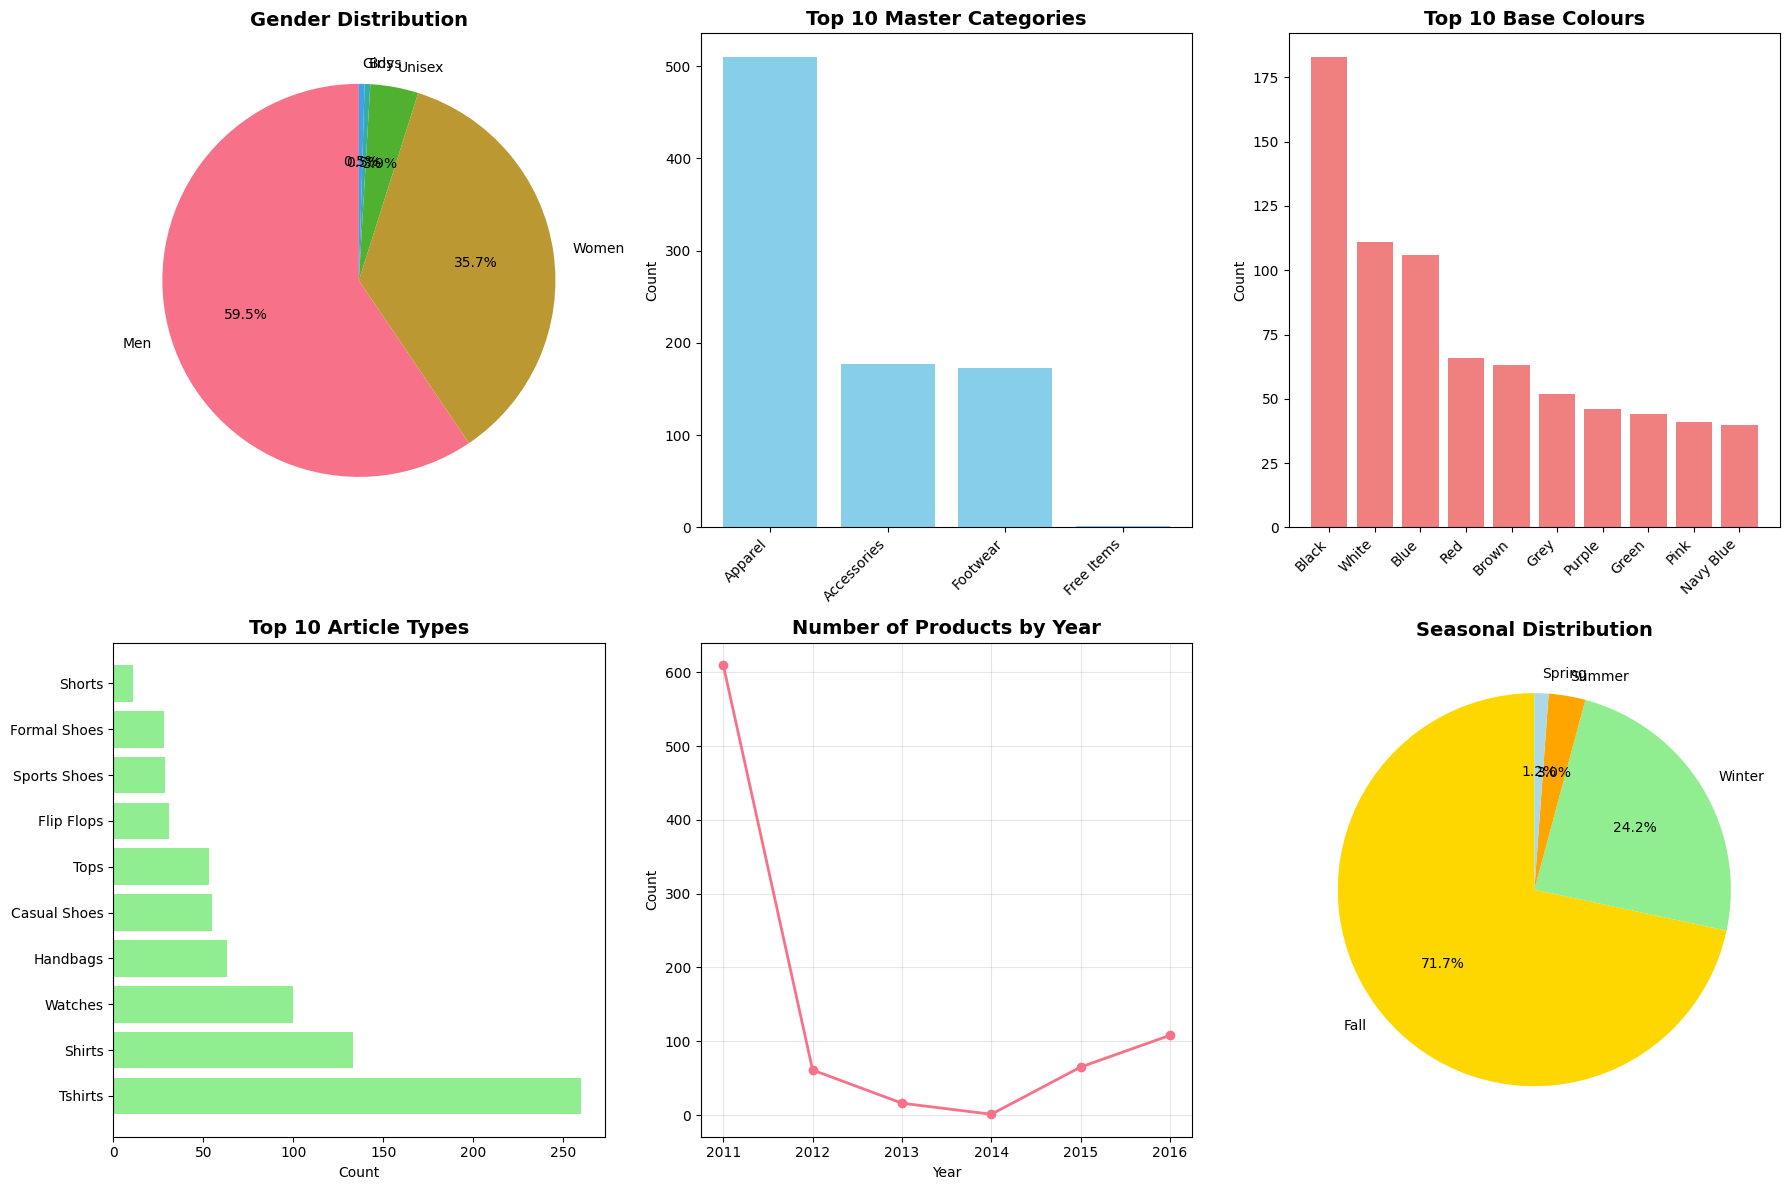

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

plot_idx = 0

# 1. Gender Distribution
if 'gender' in styles.columns:
    gender_counts = styles['gender'].value_counts()
    axes[plot_idx].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
    axes[plot_idx].set_title('Gender Distribution', fontsize=14, fontweight='bold')
    plot_idx += 1

# 2. Master Category Distribution
if 'masterCategory' in styles.columns:
    master_cat = styles['masterCategory'].value_counts().head(10)
    bars = axes[plot_idx].bar(range(len(master_cat)), master_cat.values, color='skyblue')
    axes[plot_idx].set_xticks(range(len(master_cat)))
    axes[plot_idx].set_xticklabels(master_cat.index, rotation=45, ha='right')
    axes[plot_idx].set_title('Top 10 Master Categories', fontsize=14, fontweight='bold')
    axes[plot_idx].set_ylabel('Count')
    plot_idx += 1

# 3. Base Colour Distribution
if 'baseColour' in styles.columns:
    colors = styles['baseColour'].value_counts().head(10)
    bars = axes[plot_idx].bar(range(len(colors)), colors.values, color='lightcoral')
    axes[plot_idx].set_xticks(range(len(colors)))
    axes[plot_idx].set_xticklabels(colors.index, rotation=45, ha='right')
    axes[plot_idx].set_title('Top 10 Base Colours', fontsize=14, fontweight='bold')
    axes[plot_idx].set_ylabel('Count')
    plot_idx += 1

# 4. Article Type Distribution
if 'articleType' in styles.columns:
    article_types = styles['articleType'].value_counts().head(10)
    axes[plot_idx].barh(range(len(article_types)), article_types.values, color='lightgreen')
    axes[plot_idx].set_yticks(range(len(article_types)))
    axes[plot_idx].set_yticklabels(article_types.index)
    axes[plot_idx].set_title('Top 10 Article Types', fontsize=14, fontweight='bold')
    axes[plot_idx].set_xlabel('Count')
    plot_idx += 1

# 5. Yearly Distribution
if 'year' in styles.columns:
    year_counts = styles['year'].value_counts().sort_index()
    axes[plot_idx].plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=6)
    axes[plot_idx].set_title('Number of Products by Year', fontsize=14, fontweight='bold')
    axes[plot_idx].set_xlabel('Year')
    axes[plot_idx].set_ylabel('Count')
    axes[plot_idx].grid(True, alpha=0.3)
    plot_idx += 1

# 6. Seasonal Distribution
if 'season' in styles.columns:
    season_counts = styles['season'].value_counts()
    colors_season = ['gold', 'lightgreen', 'orange', 'lightblue']
    axes[plot_idx].pie(season_counts.values, labels=season_counts.index, autopct='%1.1f%%', 
            colors=colors_season[:len(season_counts)], startangle=90)
    axes[plot_idx].set_title('Seasonal Distribution', fontsize=14, fontweight='bold')
    plot_idx += 1

# Hide unused subplots
for i in range(plot_idx, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


In [9]:
required_cols = ['id', 'image_path']
optional_cols = ['productDisplayName', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'gender']

print("Data readiness status:")
print(f"   Required columns: {[col for col in required_cols if col in styles.columns]}")
print(f"   Optional columns: {[col for col in optional_cols if col in styles.columns]}")

if 'masterCategory' in styles.columns:
    category_counts = styles['masterCategory'].value_counts()
    print("\nSample count by category:")
    for cat, count in category_counts.head(10).items():
        print(f"   {cat:15}: {count:5,}")
    
    min_samples = 100
    small_categories = category_counts[category_counts < min_samples]
    if len(small_categories) > 0:
        print(f"\nWarning: {len(small_categories)} categories have fewer than {min_samples} samples.")

output_path = 'processed_styles.csv'
styles.to_csv(output_path, index=False)
print(f"\nProcessed data saved to: {output_path}")


Data readiness status:
   Required columns: ['id', 'image_path']
   Optional columns: ['productDisplayName', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'gender']

Sample count by category:
   Apparel        :   510
   Accessories    :   177
   Footwear       :   173
   Free Items     :     1


Processed data saved to: processed_styles.csv


In [10]:
print(f"Data preprocessing completed:")
print(f"   - Valid products: {len(styles):,}")
print(f"   - Available columns: {len(styles.columns)}")
print(f"   - Image existence: 100% (filtered)")

if 'masterCategory' in styles.columns:
    print(f"   - Main categories: {styles['masterCategory'].nunique()}")

print("\nNext steps:")
print(f"   1. Image preprocessing & resizing (224x224)")
print(f"   2. Feature extraction using TensorFlow ResNet50")
print(f"   3. Feature extraction using PyTorch ResNet50")
print(f"   4. Performance comparison & recommendation system implementation")

print("\nRecommendations:")
print(f"   - Batch size: 32-64 (adjust based on memory)")
print(f"   - Image preprocessing: normalization & resizing required")
print(f"   - Feature vector: 2048 dimensions (ResNet50 output)")


Data preprocessing completed:
   - Valid products: 861
   - Available columns: 11
   - Image existence: 100% (filtered)
   - Main categories: 4

Next steps:
   1. Image preprocessing & resizing (224x224)
   2. Feature extraction using TensorFlow ResNet50
   3. Feature extraction using PyTorch ResNet50
   4. Performance comparison & recommendation system implementation

Recommendations:
   - Batch size: 32-64 (adjust based on memory)
   - Image preprocessing: normalization & resizing required
   - Feature vector: 2048 dimensions (ResNet50 output)
